In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQBN8DPW2rdiRrY34eEM53HAzakNGSRrw4ogI-j8HyCUrbqTB_z4CeIn2IvjLF-w_6sOe5pIlypJGAA/pub?output=csv'
df = pd.read_csv(url)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.duplicated().sum()

1

In [5]:
df.drop_duplicates(inplace=True)


In [6]:
df.duplicated().sum()

0

In [7]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Question 1. Do smokers have higher insurance charges than non-smokers?

Null Hypothesis: The insurance charge is not higher for smokers compared to non-smokers.

Alternate Hypothesis: There is a higher charge on insurance for smokers compared to non-smokers.

Alpha= 0.05

Since we are comparing two different sets we are going to test for normality and variance and use a T-test.

In [8]:

smoker_charges = df.loc[df['smoker']== 'yes','charges']
non_smoker_charges = df.loc[df['smoker']=='no','charges']
#Getting mean for smoker(yes/no) charges
print(f"For Smoker (n=l{len(smoker_charges)}):Mean={np.mean(smoker_charges):.2f}")
print(f"For Non-Smoker (n=l{len(non_smoker_charges)}):Mean={np.mean(non_smoker_charges):.2f}")

For Smoker (n=l274):Mean=32050.23
For Non-Smoker (n=l1063):Mean=8440.66


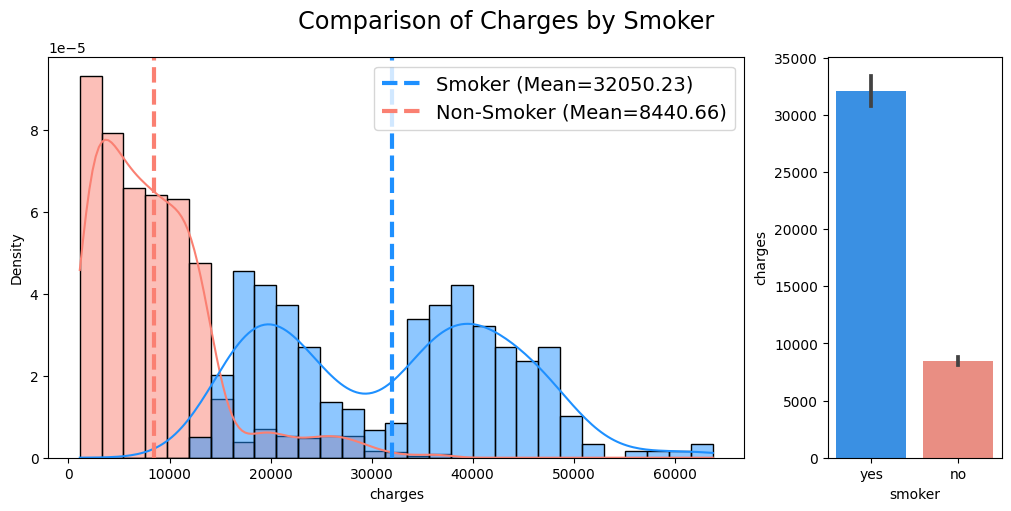

In [9]:
smoker_palette={'yes':'dodgerblue', "no":'salmon'}
## Visualizing Sample means
fig, (ax,ax_bar) = plt.subplots(figsize= (10,5), ncols=2, 
                                constrained_layout=True,
                                gridspec_kw={'width_ratios':[0.8,0.2]})


# Histogram
ax = sns.histplot(data=df,x='charges',fill=True,hue='smoker',kde=True,
                  stat='density',common_norm=False, ax=ax,
                  palette=smoker_palette)

ax.axvline(np.mean(smoker_charges), ls='--',lw=3, 
           label=f"Smoker (Mean={np.mean(smoker_charges):.2f})",color=smoker_palette['yes'])

ax.axvline(np.mean(non_smoker_charges), ls='--', lw=3, 
           label=f"Non-Smoker (Mean={np.mean(non_smoker_charges):.2f})",color=smoker_palette['no'])

ax.legend(prop={"size":14}, loc='upper right')#bbox_to_anchor=[1,1])
## Barplot
sns.barplot(data=df, x='smoker',y='charges',ax = ax_bar,palette=smoker_palette)
fig.suptitle('Comparison of Charges by Smoker',fontsize='xx-large');

In [10]:
#getting outliers for smokers
zscores_smoker=stats.zscore(smoker_charges)
outliers_smoker=abs(zscores_smoker)>3
np.sum(outliers_smoker)

0

In [11]:
#getting outliers for non-smokers
zscores_non_smoker=stats.zscore(non_smoker_charges)
outliers_non_smoker= abs(zscores_non_smoker)>3
np.sum(outliers_non_smoker)

24

In [12]:
non_smoker_charges.loc[~outliers_non_smoker]

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1039, dtype: float64

In [13]:
non_smoker_charges - non_smoker_charges.loc[~outliers_non_smoker]
non_smoker_charges

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1063, dtype: float64

In [14]:
#check for normality for smoker
result_smoker= stats.normaltest(smoker_charges)
result_smoker

NormaltestResult(statistic=61.03941356533816, pvalue=5.564930630036463e-14)

In [15]:
#check for normality for non-smoker
result_non_smoker = stats.normaltest(non_smoker_charges)
result_non_smoker

NormaltestResult(statistic=316.23579659917766, pvalue=2.1392881146814186e-69)

For both smoker and non-smoker the p-value is greater than 0.05 so we can assume these are normal distributions. 

In [16]:
#checking for equal variance
result = stats.levene(smoker_charges, non_smoker_charges)
result

LeveneResult(statistic=332.47137394800666, pvalue=1.670117565125241e-66)

Since our p-value is < 0.05 we reject the null hypothesis and there is not equal variance. Since there is not equal variance we shall perform a Welch's T-test which is designed to account for unequal variance.

In [17]:
result=stats.ttest_ind(smoker_charges,non_smoker_charges,equal_var=False)
print(result)
result.pvalue < 0.05

Ttest_indResult(statistic=32.7423097372529, pvalue=6.261720774727631e-103)


True

Final Conclusion:

Since our p-value is less than 0.05 we reject the null hypothesis and accept the alternative hypothesis. Which means there is a higher insurance charge for smokers compared to non-smokers. 

# Question 2: Are men more likely to smoke than woman?

Null hypothesis: Men are just as likely to be smokers as woman.

Alternate hypothesis: Men are more likely to smoke than woman. 

Alpha = 0.05

In [18]:
#Converting smoker from yes/no to 0/1 for hypothesis testing
smoker_df = df
smoker_df['smoker'] = smoker_df['smoker'].apply(lambda x:0 if x=='no' else 1)
smoker_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520


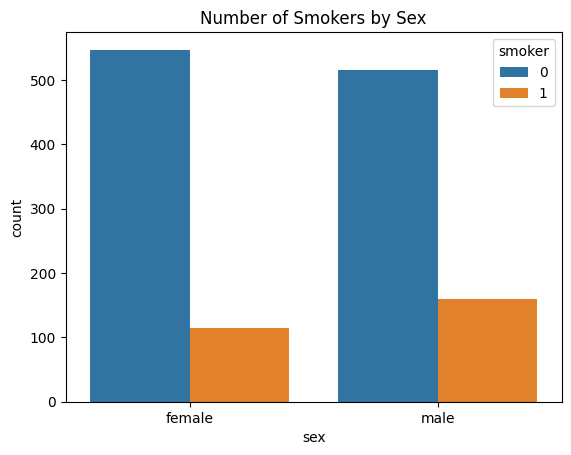

In [19]:
ax = sns.countplot(data=smoker_df, x='sex', hue='smoker')
ax.set_title('Number of Smokers by Sex');

Since it is a category we will be using a Chi-Squared Test. We need a contingency table to be able to run this test. 

In [20]:
# calculate the contingency table with pd.cross-tab
table =pd.crosstab(smoker_df['sex'],smoker_df['smoker'])
table

smoker,0,1
sex,,
female,547,115
male,516,159


In [21]:
#run the test and save the output
result = stats.chi2_contingency(table)
chi2, p, deg_free, expected_vals = result

In [22]:
# What was our p-value?
print(p)
p<0.05

0.0062765550120107375


True

The p-value is much less than 0.05 so we reject the null hypothesis and accept the alternate hypothesis that it is more likely that a male is smoker than a female. 

# Question 3: Do different regions have different charges, average?

Null hypothesis: There is no difference in the charges,on average based on the region.

Alternate hypothesis: There is a different charge, on average based on the region.

Alpha=0.05

In [23]:
#checking regions values counts
df['region'].value_counts()

southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64

Since we have more than 2 choices in region we will perform an One-ANOVA test and we will use Kruskal for stats. 

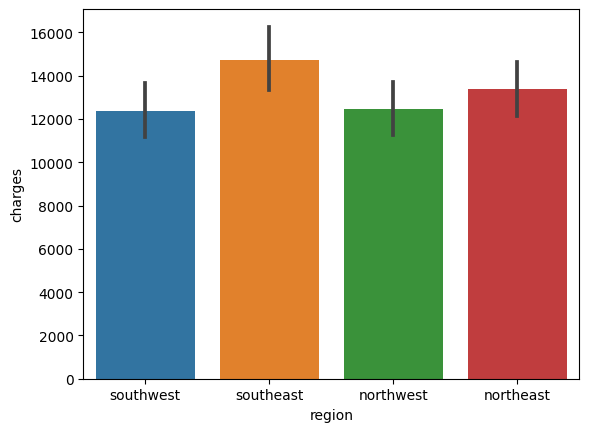

In [24]:
sns.barplot(data=df, x='region', y='charges');

In [25]:
## Create groups dictionary. There are only 4 groups, but this is even more helpful when there are many groups
groups = {}
## Loop through all unique categories
for i in df['region'].unique():
    ## Get series for group and rename
    data = df.loc[df['region']==i,'charges'].copy()
    
    # save into the dictionary
    groups[i] = data
groups.keys()

dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

In [26]:
## Running normal test on each group and confirming there are >20 in each group
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    ## save the p val, test statistic, and the size of the group
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}
## convert to a dataframe
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

,n,p,test stat
southwest,325.0,6.125298e-23,102.294059
southeast,364.0,4.953297e-15,65.877446
northwest,324.0,6.502634e-24,106.779670
northeast,324.0,1.455431e-19,86.747629


In [27]:
### checking sig with pandas 
norm_results_df['sig'] = norm_results_df['p'] < .05 
norm_results_df

,n,p,test stat,sig
southwest,325.0,6.125298e-23,102.294059,True
southeast,364.0,4.953297e-15,65.877446,True
northwest,324.0,6.502634e-24,106.779670,True
northeast,324.0,1.455431e-19,86.747629,True


In [28]:
stats.levene(*groups.values())

LeveneResult(statistic=5.553479860699911, pvalue=0.0008689544824002284)

In [42]:
# perform the correct hypothesis test
# note again the use of the * operator for convenience
result = stats.kruskal( *groups.values())
result

KruskalResult(statistic=4.622506584464645, pvalue=0.20161983372311595)

In [43]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
## save the values as charges and the labels to the region
values = df['charges']
labels = df['region']

In [44]:
# check for outliers
values_outliers = np.abs(stats.zscore(values)) > 3

#How many outliers?
values_outliers.sum()

7

In [45]:
len(values_outliers)

1337

In [46]:
#remove outliers
values_cln = values[values_outliers==False]
values_cln

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1330, dtype: float64

In [47]:
# check for outliers
labels_outliers = np.abs(stats.zscore(values)) > 3

#How many outliers?
labels_outliers.sum()

7

In [48]:
len(labels_outliers)

1337

In [49]:
#remove outliers
labels_cln = labels[labels_outliers==False]
labels_cln

0       southwest
1       southeast
2       southeast
3       northwest
4       northwest
          ...    
1333    northwest
1334    northeast
1335    southeast
1336    southwest
1337    northwest
Name: region, Length: 1330, dtype: object

In [50]:
## perform tukey's multiple comparison test and display the summary
tukeys_results = pairwise_tukeyhsd(values,labels)
tukeys_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
northeast,northwest,-955.5437,0.7457,-3397.7353,1486.648,False
northeast,southeast,1329.0269,0.4746,-1045.1237,3703.1776,False
northeast,southwest,-1059.4471,0.6793,-3499.7595,1380.8652,False
northwest,southeast,2284.5706,0.0643,-89.58,4658.7212,False
northwest,southwest,-103.9035,0.9995,-2544.2158,2336.4088,False
southeast,southwest,-2388.4741,0.0477,-4760.6915,-16.2567,True


The results above show that there is only a significant difference in on region which is the southeast to the southwest. So on average we accept the null hypothesis that there is not a difference in charges on average based on region.